In [29]:
#import modules
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.pyplot import figure, show
from scipy.integrate import simps

In [3]:
#galaxy template
tau0 = 0.5 #Gyr
stelmass0 = 10**9 #Msol
galage0 = 0.5e9 #Gyr
metal0 = 0.0196 #±0.0014 https://arxiv.org/abs/1703.10834
AV0 = 0
logage = np.log10(galage0)

In [5]:
data4color = np.genfromtxt('Template11.txt', unpack=True) #extract data from 4color as txt file
row = np.where(data[0]==8.706548) #find index row where age is equal to template
i = row[0][0] #get integer from that row
Mtemp = data[10,i] #total stellar mass of template in normalised solar masses
print(Mtemp)

0.46309


In [15]:
data_age_extr = np.genfromtxt('Template11age_extr.txt', unpack=True) #extract data from age.extr as txt file
Lumtemp = data_age_extr[1] #extract luminosity
wavel = data_age_extr[0]
Mpet = 10**8 #stellar mass pet galaxy in solar masses
Lumnorm = lumtemp/Mtemp*Mpet #normalise luminosites
print(Lumnorm)

[2.57682092e+03 2.94651148e+03 3.15057548e+03 ... 7.61579822e-04
 4.10632922e-04 2.40428426e-04]


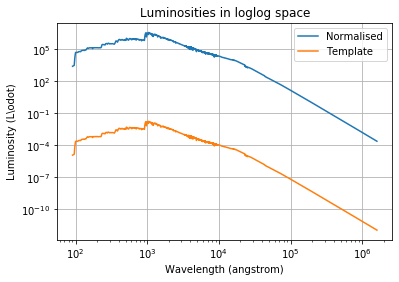

In [23]:
fig = figure()
frame = fig.add_subplot(1,1,1)
frame.loglog(wavel, Lumnorm, label = "Normalised")
frame.loglog(wavel, Lumtemp, label = "Template")
frame.set_xlabel('Wavelength (angstrom)')
frame.set_ylabel('Luminosity (L\odot)')
frame.set_title('Luminosities in loglog space')
frame.grid()
frame.legend()
show()

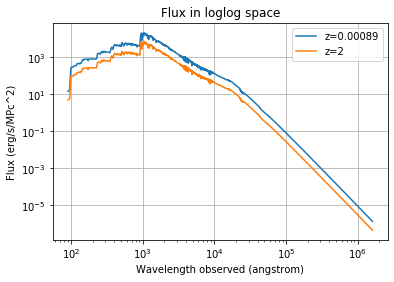

In [27]:
#4a
dL = 3.8 #MPc
z1 = 0.00089 
z2 = 2
flux1 = Lumnorm/((1+z1)*4*np.pi*dL**2)
flux2 = Lumnorm/((1+z2)*4*np.pi*dL**2)
wavelobs = wavel*(1+z1)

fig = figure()
frame = fig.add_subplot(1,1,1)
frame.loglog(wavelobs, flux1, label = f'z={z1}')
frame.loglog(wavelobs, flux2, label = "z=2")
frame.set_xlabel('Wavelength observed (angstrom)')
frame.set_ylabel('Flux (erg/s/MPc^2)')
frame.set_title('Flux in loglog space')
frame.grid()
frame.legend()
show()

In [32]:
#using simspons rule to determine the convolution integrals
convol1 = simps(flux1, wavelobs) 
convol2 = simps(flux2, wavelobs)
print(convol1)
print(convol2)

20074152.23203287
6697339.409173126
